# <font color='Blue'>Redes Neurais - Previsão de Câncer de Mama (Benigno/Maligno)</font>




Matplotlib is building the font cache; this may take a moment.


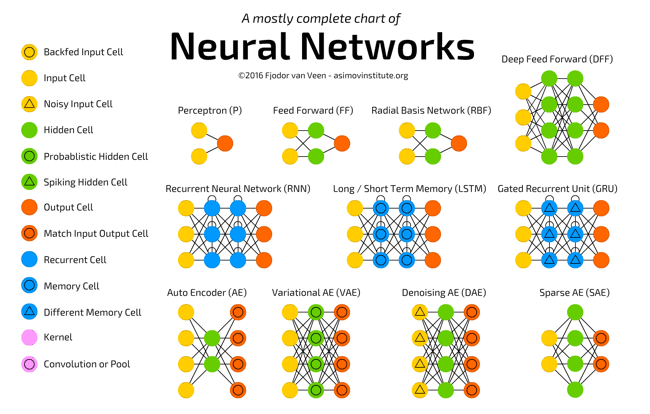

In [1]:
from PIL import Image
%matplotlib inline
im = Image.open("RedesNeurais.png")
im.show()
im 

## Multilayer Perceptron (MLP)

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

As Redes Neurais são uma estrutura de aprendizado de máquina que tenta imitar o padrão de aprendizagem de redes neurais biológicas naturais. As redes neurais biológicas têm neurônios interconectados com dendritos que recebem entradas, e com base nessas entradas eles produzem um sinal de saída através de um axônio para outro neurônio. Vamos tentar imitar esse processo através do uso de Redes Neurais Artificiais (RNAs), que apenas nos referiremos como redes neurais a partir de agora. O processo de criação de uma rede neural começa com a forma mais básica, um único perceptron.

Vamos começar nossa discussão falando sobre o Perceptron! Um perceptron tem uma ou mais entradas, um viés (bias), uma função de ativação e uma única saída. O perceptron recebe entradas, multiplica essas entradas por algum peso e passa-as para uma função de ativação para produzir uma saída. Há muitas funções de ativação possíveis tais como a função logística, uma função trigonométrica, uma função de step, etc. Também nos certificamos de adicionar um viés para o perceptron, isso evita problemas onde todas as entradas poderiam ser iguais a zero (significado Nenhum peso multiplicativo teria um efeito). Confira o diagrama abaixo para uma visualização de um perceptron:

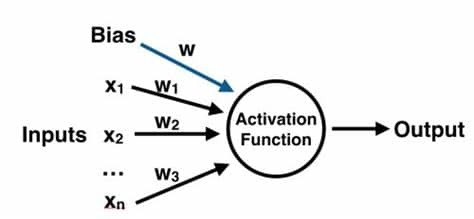

In [2]:
from PIL import Image
%matplotlib inline
im = Image.open("perceptron.jpg")
im.show()
im 

Uma vez que temos a saída podemos compará-lo com um rótulo conhecido e ajustar os pesos de acordo (os pesos normalmente começam com valores de inicialização aleatórios). Continuamos a repetir este processo até termos atingido um número máximo de iterações permitidas ou uma taxa de erro aceitável.

Para criar uma rede neural, simplesmente começamos a adicionar camadas de perceptrons juntos, criando um modelo de perceptron multicamada de uma rede neural. Você terá uma camada de entrada que recebe diretamente suas entradas de atributos e uma camada de saída que criará as saídas resultantes. Quaisquer camadas intermediárias são conhecidas como camadas ocultas porque elas não "veem" diretamente as entradas ou saídas do atributo. O diagrama abaixo demonstra o que é uma rede perceptron multicamada:

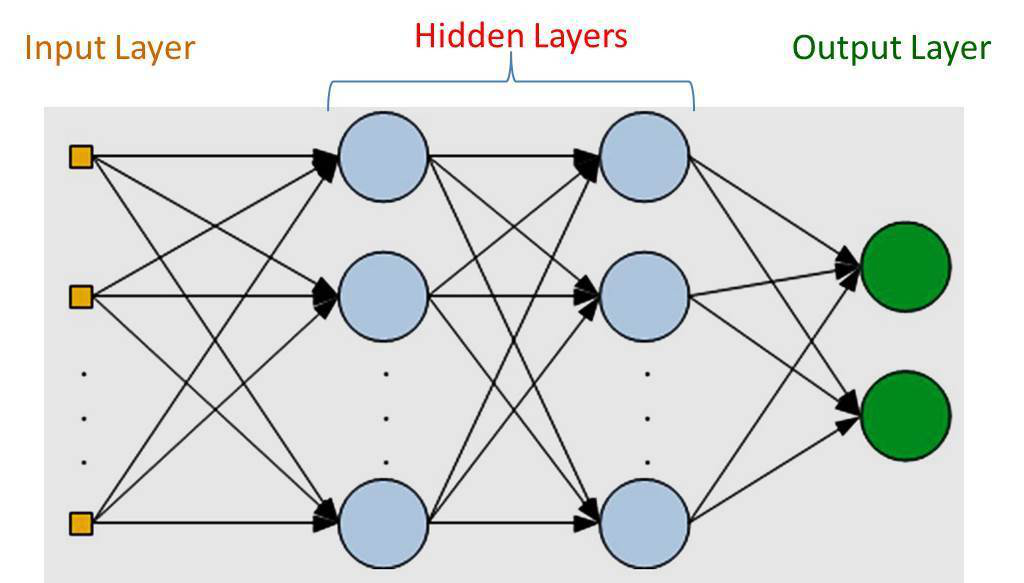

In [3]:
from PIL import Image
%matplotlib inline
im = Image.open("mlp.jpg")
im.show()
im 

# Importar os Dados

In [4]:
# importar os pacotes necessários
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [5]:
# Dados de leitura
cancer1 = pd.read_csv('breast-cancer-wisconsin.csv')

# Informações básicas
print(f'Registros: {len(cancer1)}\nVariáveis: {len(cancer1.columns)}')

# Mostrar todas as colunas da base:
pd.set_option('display.max_columns', None)

Registros: 569
Variáveis: 33


# Análise Exploratória

A coluna id representa o número de identificação.

A coluna diagnosis é a variável alvo.

M - Maligno
B - Benigno

In [6]:
# ver as 5 primeiras entradas
cancer1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# eliminar uma coluna com erro
cancer1.drop('Unnamed: 32', axis=1, inplace=True)

In [8]:
cancer1.sample().T

,12
id,846226
diagnosis,M
radius_mean,19.17
texture_mean,24.8
perimeter_mean,132.4
area_mean,1123
smoothness_mean,0.0974
compactness_mean,0.2458
concavity_mean,0.2065
concave points_mean,0.1118


In [9]:
#ultimas linhas
cancer1.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [10]:
cancer1.size

18208

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(cancer1, title='Relatório- Redes_Neurais_Detecção do Câncer de Mamas',html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file(output_file="Relatório- Redes_Neurais_Detecção do Câncer de Mama.html")

In [ ]:
import sweetviz as sv
## ## Sweetviz  Relatório
my_report = sv.analyze(cancer1) # cria o reporte e chama de my_report
my_report.show_html()

# sv.anlyze(cancer1).show_html()

In [ ]:
# lista de todas as colunas do dataset
cancer1.columns

In [ ]:
# Veja alguns detalhes
cancer1.info()

In [ ]:
## verificando o tipo das variáveis de cada coluna (se são strings, integers, floats, bool)
cancer1.dtypes

In [ ]:
# formato do dataset (linhas; colunas)
cancer1.shape

In [ ]:
# verificação da presença de valores ausentes no dataset é de extrema importância, pois é o reflexo direto da qualidade do mesmo.
cancer1.isnull().sum()

In [ ]:
# valores únicos para cada feature
cancer1.nunique().sort_values()

In [ ]:
# retorna a quantidade de linha de todas as colunas
cancer1.count()

In [ ]:
# Verificando o skew de cada atributo
cancer1.skew()

In [ ]:
# Verifique se há duplicado
cancer1.duplicated().sum()

In [ ]:
cancer1['diagnosis'].sample(10)

In [ ]:
# vendo a quantidade de 'benignos' e 'malignos' em nossos dados
cancer1['diagnosis'].value_counts()

In [ ]:
# resumo estatístico das variáveis numéricas.
cancer1.describe()

In [ ]:
cancer1.describe(include ='all')

In [ ]:
# Correlação de Pearson
cancer1.corr(method = 'pearson').round(4)

In [ ]:
# Correlação de spearman - leva em consideração  a correlação positiva e negativa
cancer1.corr('spearman').round(4)

In [ ]:
cancer1.corr().unstack().sort_values().drop_duplicates()

In [ ]:
corr = cancer1.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns);

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(cancer1.corr(), annot = True, cmap="coolwarm");

In [ ]:
# Uma maneira mais robusta de descobrir correlações diferentes das observações acima é gerar uma correlação completa
# tabela com variação de -1 a 1
cancer1.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
# porcentagem de B e M
cancer1['diagnosis'].value_counts(normalize=True)

In [ ]:
# Look at breakdown of label
cancer1['diagnosis'].value_counts()
sns.countplot(cancer1['diagnosis']);

In [ ]:
# ver porcentagem dos diagnósticos
print("Diagnósticos:")
print(cancer1.diagnosis.value_counts() / cancer1.shape[0])

# plotar o gráfico de barras com os diagnósticos
fig, ax = plt.subplots()
sns.countplot('diagnosis', data=cancer1, ax=ax)
ax.set_title("Diagnósticos")
plt.show();

In [ ]:
grafico = sns.countplot(cancer1['diagnosis'], palette='hls')
grafico.set(title='Contagem de cada classificação', 
            xlabel='Diagnóstico', 
            ylabel='Número de ocorrências')

In [ ]:
# plotar o histograma das features
fix, ax = plt.subplots(figsize=(12,8))
cancer1.drop('id', axis=1).hist(ax=ax)
plt.tight_layout();

In [ ]:
# plotar heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cancer1.drop('id', axis=1).corr(), cmap='coolwarm', ax=ax)
plt.show();

In [ ]:
# plotando pairplots
sns.pairplot(cancer1.iloc[:, 1:6], hue='diagnosis', palette='Set1');

In [ ]:
sns.lmplot('radius_mean','texture_mean',data=cancer1,hue='diagnosis');

In [ ]:
sns.lmplot('perimeter_mean','area_mean',data=cancer1,hue='diagnosis');

In [ ]:
cancer1.plot(kind= 'box' , subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(20,20));

In [ ]:
sns.catplot(x='diagnosis', y='area_mean', data=cancer1, kind = 'boxen', color = 'blue');

In [ ]:
sns.catplot(x='diagnosis', y='perimeter_mean', data=cancer1, kind = 'boxen', color = 'purple');

In [ ]:
from matplotlib import style
style.use("seaborn-colorblind")
diagnosis = [0,1]
sns.scatterplot(data= cancer1, x='texture_se', y='area_se', cmap='Accent_r', hue='diagnosis');

In [ ]:
sns.swarmplot(x='diagnosis', y='concavity_se', data=cancer1);

In [ ]:
from scipy import stats
sns.distplot(cancer1.fractal_dimension_se, fit = stats.norm);

In [ ]:
for i in cancer1.describe(include='O').columns:
    for j in cancer1.describe(exclude='O').columns:
        plt.subplots()
        print(sns.boxplot(x=i,y=j,hue='diagnosis',data=cancer1));

In [ ]:
# porcentagem de amostras benignas e malignas

plt.figure(figsize = (14, 4))

ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

proportion = cancer1['diagnosis'].value_counts()/cancer1.shape[0]
malignant = len(cancer1[cancer1['diagnosis'] == 'M'])
benign = len(cancer1[cancer1['diagnosis'] == 'B'])

sns.countplot(x = 'diagnosis', data = cancer1, 
              palette = ['grey', 'orange'], ax = ax0)
ax0.set_title('Número de casos por diagnóstico', size = 13)
ax0.set_xlabel(None)
ax0.text(x = 0, y = 100, s = malignant, size = 11, 
         color = 'black', horizontalalignment = 'center')
ax0.text(x = 1, y = 100, s = benign, size = 11,
        color = 'black', horizontalalignment = 'center')
ax0.yaxis.set_visible(False)
sns.despine(left = True)

proportion.plot(kind = 'pie', autopct = '%.1f%%', 
                explode = [0, 0.05], shadow = True,
                labels = ['B', 'M'], colors = ['orange', 'grey'], 
                ax = ax1)
ax1.set_title('Percentual de casos por diagnóstico')
ax1.yaxis.set_visible(False)

plt.subplots_adjust(wspace = 0.5)
plt.show();

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

fig = px.scatter_3d(cancer1,x='radius_mean',y='texture_mean',z='fractal_dimension_se',color='diagnosis')
fig.update_layout(title="radius_mean v/s Direct_Bilirubin v/s fractal_dimension_se",title_x=0.5)

In [ ]:
fig = px.scatter(cancer1, x='smoothness_mean', y='symmetry_mean',color='diagnosis',template='plotly_dark')
fig.update_layout(title="smoothness_mean v/s symmetry_mean",xaxis_title="smoothness_mean",yaxis_title="symmetry_mean",title_x=0.5)
fig.show();

In [ ]:
fig = go.Figure(go.Histogram2dContour(x=cancer1['fractal_dimension_se'],
        y=cancer1['radius_worst']))
fig.update_layout(title='Density of fractal_dimension_se & radius_worst',xaxis_title="fractal_dimension_se",yaxis_title="radius_worst")
fig.show();

# Importando os Dados

In [ ]:
# importando os dados
from sklearn.datasets import load_breast_cancer


In [ ]:
# criar a intancia
cancer = load_breast_cancer()

In [ ]:
# esta em formato de dicionario
cancer.keys()

In [ ]:
# Maligno ou Benigno
cancer.target_names

In [ ]:
# Descrição completa do dataset
print(cancer['DESCR'])

In [ ]:
cancer['data'].shape

# Preparação dos dados

In [ ]:
#vou usar o StardardScaler, que vem junto com sklearn.preprocessing, para padronizar nossos dados numérico
# Pre-processamento e Padronização dos dados

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = cancer['data']
y = cancer['target']

In [ ]:
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Pré-Processamento

A rede neural pode ter dificuldade em convergir antes do número máximo de iterações permitidas se os dados não forem normalizados. O Perceptron de várias camadas é sensível ao dimensionamento dos atributos, por isso é altamente recomendável escalar seus dados. Observe que você deve aplicar o mesmo escalonamento ao conjunto de teste para obter resultados significativos. Existem diversos métodos diferentes para a normalização dos dados, vamos usar o built-in StandardScaler para a padronização.

In [ ]:
# Padronização
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
# Aplicando a padronização aos dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Treinamento do Modelo

Agora é hora de treinar nosso modelo. O SciKit Learn torna isso incrivelmente fácil, usando objetos estimadores. Neste caso, iremos importar o nosso estimador (o modelo Multi-Layer Perceptron Classifier) da biblioteca neural_network do SciKit-Learn!

In [ ]:
from sklearn.neural_network import MLPClassifier

Em seguida, criamos uma instância do modelo, há uma série de parâmetros que você pode escolher para definir e personalizar aqui, vamos definir apenas o hidden_layer_sizes. Para este parâmetro você passa uma tupla que consiste no número de neurônios que você quer em cada camada, onde a entrada n-ésima na tupla representa o número de neurônios na n-ésima camada do modelo MLP. Há muitas maneiras de escolher esses números, mas, por simplicidade, escolheremos três camadas com o mesmo número de neurônios que existem no nosso conjunto de dados:

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (30,30,30))

# testar max_iter=1000 = Aumenta em 1%  a acuracia
#testar (60,60,60) = diminui o erro do tipo 2 de 'UM' para "ZERO" erro

Agora que o modelo foi feito podemos ajustar os dados de treinamento para o nosso modelo, lembre-se que esses dados já foram processados e dimensionados:

In [ ]:
mlp.fit(X_train, y_train)

Você pode ver a saída que mostra os valores padrão dos outros parâmetros no modelo. Eu encorajo você a brincar com eles e descobrir quais os efeitos que eles têm em seu modelo! Simbora? Testa outros valores aí...ok?

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

# instanciando o modelo de Random Forest
#ml_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                  #random_state = 42)

# treinando o modelo 
#ml_model.fit(X_train, y_train)

## Previsões e Avaliação

Agora que temos um modelo, é hora de usá-lo para obter previsões! Podemos fazer isso simplesmente com o método predict () fora de nosso modelo ajustado:

In [ ]:
predictions = mlp.predict(X_test)

Agora podemos usar as métricas construídas pelo SciKit-Learn, como um relatório de classificação e uma matriz de confusão, para avaliar o desempenho do nosso modelo:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# realizar as previsões no dataset de teste
#y_pred = ml_model.predict(X_test)

# ver acurácia geral
#print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))

#imprimir o classification report
#print('\n[Classification Report] Random Forest')
#print( classification_report(y_test, y_pred) )

print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

In [ ]:
# plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test,predictions),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

Parece que somente 4 tumores foram clasisficados de forma incorreta, deixando-nos com uma taxa de 98% de precisão. Isso é muito bom considerando as poucas linhas de código que tivemos de escrever! A desvantagem entretanto em usar um modelo Multi-Layer Preceptron é como difícil é interpretar o próprio modelo. Os pesos e vieses não serão facilmente interpretáveis em relação a quais características são importantes para o próprio modelo.

No entanto, se você quiser extrair os pesos e viés (bias) do MLP após o treinamento do seu modelo, você usa seus atributos públicos coefs_ e intercepts_.

In [ ]:
len(mlp.coefs_)

In [ ]:
len(mlp.coefs_[0])

In [ ]:
len(mlp.intercepts_[0])

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
cancer1 = AV.AutoViz ("breast-cancer-wisconsin.csv")

# Resumo

Redes Neurais são algoritmos que tentam imitar o Cérebro Humano.

Podemos utilizar o algoritmo MPL(que é uma rede neural com 1 ou mais camadas ocultas) para problemas de classificação;


# FIM
